In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [3]:
df = pd.read_csv("bol_sales.csv")
df.head()

id  gender  income  distance_center  website_visits  pages_viewed  \
0  person_1  female    7065              4.6              30           105   
1  person_2  female   23028              9.8              23            81   
2  person_3  female  103377              9.2              11            38   
3  person_4  female    9815              3.2              16            54   
4  person_5  female   22646             10.1              21            78   

   time_social_media  spent_bol  
0                117       1232  
1                 70       1396  
2                 94       1240  
3                124        720  
4                119       1379

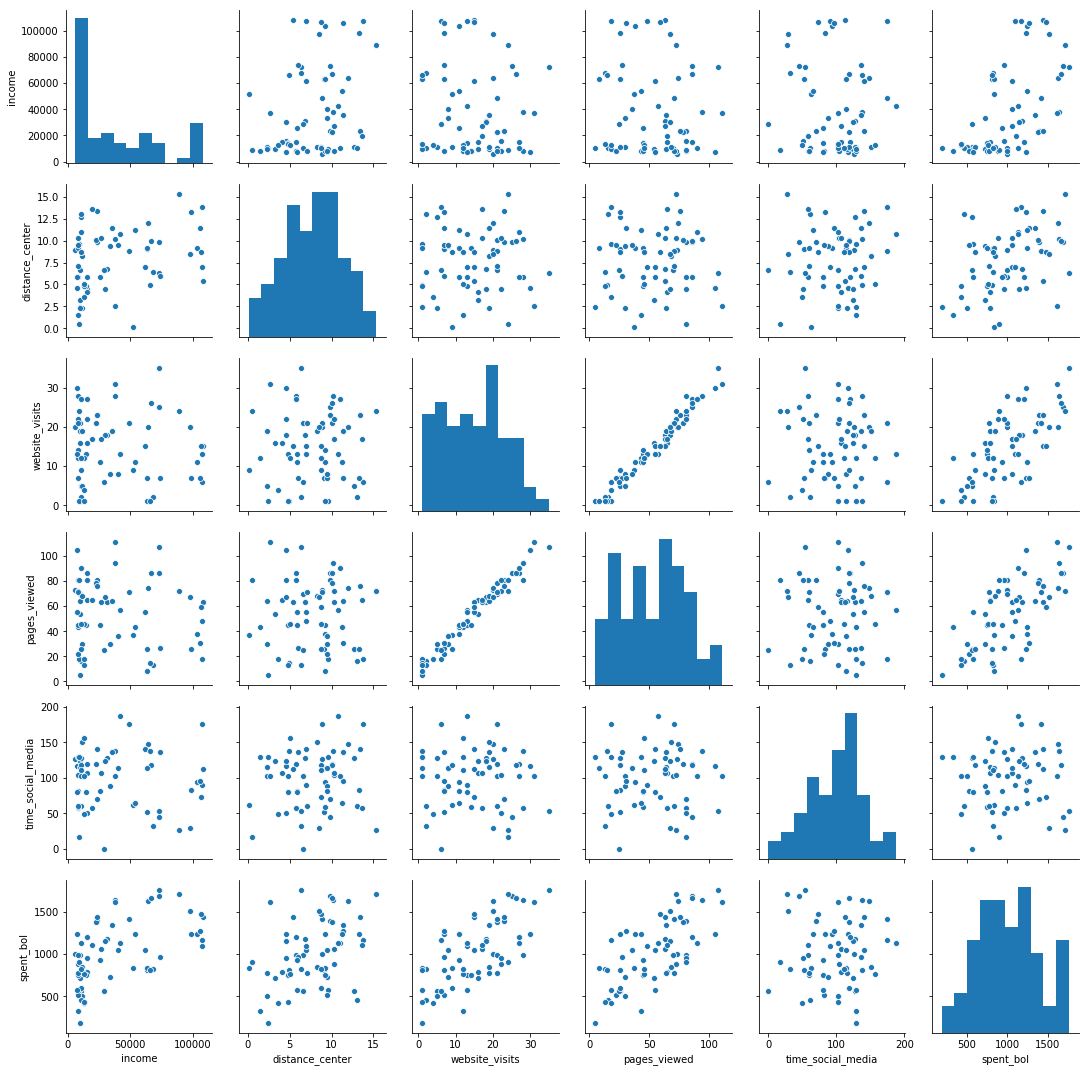

In [4]:
sns.pairplot(df)

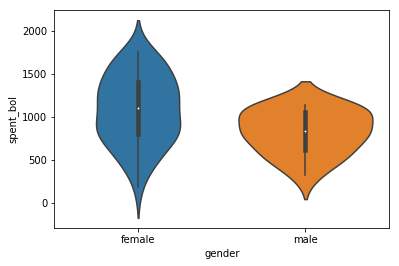

In [15]:
sns.violinplot(x='gender', y='spent_bol', data=df)

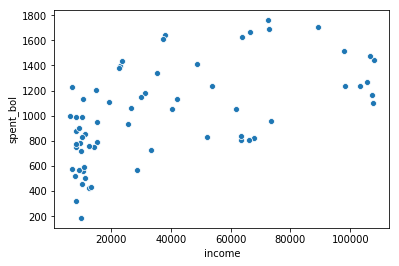

In [40]:
sns.scatterplot(x='income', y='spent_bol', data=df)

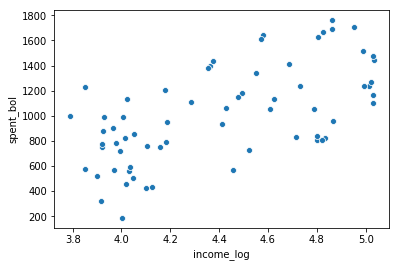

In [43]:
df['income_log']= df['income'].apply(math.log10)
sns.scatterplot(x='income_log', y='spent_bol', data=df)

In [30]:
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1)
df.head()

id  gender  income  distance_center  website_visits  pages_viewed  \
0  person_1  female    7065              4.6              30           105   
1  person_2  female   23028              9.8              23            81   
2  person_3  female  103377              9.2              11            38   
3  person_4  female    9815              3.2              16            54   
4  person_5  female   22646             10.1              21            78   

   time_social_media  spent_bol  female  male  
0                117       1232       1     0  
1                 70       1396       1     0  
2                 94       1240       1     0  
3                124        720       1     0  
4                119       1379       1     0

In [44]:
X = df[['income_log', 'distance_center', 'website_visits', 'female']]
X.head()

income_log  distance_center  website_visits  female
0    3.849112              4.6              30       1
1    4.362256              9.8              23       1
2    5.014424              9.2              11       1
3    3.991890              3.2              16       1
4    4.354992             10.1              21       1

In [45]:
y = df['spent_bol']

In [57]:
lm = LinearRegression()
lm.fit(X, y)

lm.coef_

array([517.3542101 ,  26.3249302 ,  30.80746797, 162.35505322])

In [56]:
y_pred = lm.predict(X)

In [55]:
math.sqrt(mean_squared_error(df['spent_bol'],y_pred))

63.74979362634677

In [61]:
df_ho = pd.read_csv('bol_sales_holdout.csv')
dummies = pd.get_dummies(df_ho['gender'])
df_ho = pd.concat([df_ho, dummies], axis=1)
df_ho['income_log']= df_ho['income'].apply(math.log10)
X_ho = df_ho[['income_log', 'distance_center', 'website_visits', 'female']]

In [62]:
y_pred_ho = lm.predict(X_ho)

In [63]:
df_answers = pd.read_csv('bol_sales_holdout_answers.csv')
math.sqrt(mean_squared_error(df_answers['spent_bol'],y_pred_ho))

83.92373028885682